In [15]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [16]:
# File to Load (Remember to Change These)
drudata = "Pymaceuticals/data/mouse_drug_data.csv"
clinitrial = "Pymaceuticals/data/clinicaltrial_data.csv"

In [17]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(drudata)
study = pd.read_csv(clinitrial)
# Combine the data into a single dataset
data_complete = pd.merge(study, mouse, how="left", on="Mouse ID")

# Display the data table for preview

data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


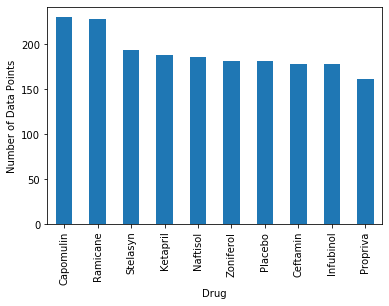

In [18]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint  
means = data_complete.groupby('Drug').mean()['Tumor Volume (mm3)']
medi = data_complete.groupby('Drug').median()['Tumor Volume (mm3)']
vari = data_complete.groupby('Drug').var()['Tumor Volume (mm3)']
sds = data_complete.groupby('Drug').std()['Tumor Volume (mm3)']
sems = data_complete.groupby('Drug').sem()['Tumor Volume (mm3)']
summary_table = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medi,
                              "Tumor Volume Variance":vari,
                              "Tumor Volume Std. Dev.":sds,
                              "Tumor Volume Std. Err.":sems})

counts = data_complete['Drug'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()
